## Dataset -- https://www.kaggle.com/datasets/alikalwar/uae-used-car-prices-and-features-10k-listings

In [200]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [201]:
data = pd.read_csv('uae_used_cars_10k.csv')
print(f"dataset size: {data.shape}")    
print(f"dataset columns: {data.columns}")
print(f"dataset info: {data.info()}")
data.head()

dataset size: (10000, 12)
dataset columns: Index(['Make', 'Model', 'Year', 'Price', 'Mileage', 'Body Type', 'Cylinders',
       'Transmission', 'Fuel Type', 'Color', 'Location', 'Description'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Make          10000 non-null  object
 1   Model         10000 non-null  object
 2   Year          10000 non-null  int64 
 3   Price         10000 non-null  int64 
 4   Mileage       10000 non-null  int64 
 5   Body Type     10000 non-null  object
 6   Cylinders     9895 non-null   object
 7   Transmission  10000 non-null  object
 8   Fuel Type     10000 non-null  object
 9   Color         10000 non-null  object
 10  Location      10000 non-null  object
 11  Description   10000 non-null  object
dtypes: int64(3), object(9)
memory usage: 937.6+ KB
dataset info: None


,Make,Model,Year,Price,Mileage,Body Type,Cylinders,Transmission,Fuel Type,Color,Location,Description
0,toyota,camry,2016,47819,156500,Sedan,4,Automatic Transmission,Gasoline,Black,Dubai,"2016 toyota camry with Rear camera, Leather se..."
1,kia,sorento,2013,61250,169543,SUV,4,Automatic Transmission,Gasoline,Grey,Abu Dhabi,"2013 kia sorento with Sunroof, Adaptive cruise..."
2,mini,cooper,2023,31861,221583,Soft Top Convertible,4,Automatic Transmission,Gasoline,Grey,Dubai,"2023 mini cooper with Adaptive cruise control,..."
3,nissan,altima,2016,110322,69754,Sedan,4,Automatic Transmission,Gasoline,Red,Dubai,"2016 nissan altima with Rear camera, Adaptive ..."
4,toyota,land-cruiser-76-series,2020,139994,71399,Pick Up Truck,4,Manual Transmission,Gasoline,White,Dubai,2020 toyota land-cruiser-76-series with Adapti...


In [202]:
data.isna().sum()

Make              0
Model             0
Year              0
Price             0
Mileage           0
Body Type         0
Cylinders       105
Transmission      0
Fuel Type         0
Color             0
Location          0
Description       0
dtype: int64

In [203]:
# fill cylinder column with mode value and change "Unknown" to mode value
data['Cylinders'] = data['Cylinders'].replace('Unknown', np.nan)
data['Cylinders'] = data['Cylinders'].fillna(data['Cylinders'].mode()[0])
data['Cylinders'] = data['Cylinders'].astype(int)

In [204]:
data = data.drop("Description", axis=1)
data = data.drop("Location", axis=1)
data = data.drop("Model", axis=1)
data = data.drop("Color", axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Make          10000 non-null  object
 1   Year          10000 non-null  int64 
 2   Price         10000 non-null  int64 
 3   Mileage       10000 non-null  int64 
 4   Body Type     10000 non-null  object
 5   Cylinders     10000 non-null  int64 
 6   Transmission  10000 non-null  object
 7   Fuel Type     10000 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.1+ KB


numerical data: Index(['Year', 'Price', 'Mileage', 'Cylinders'], dtype='object')


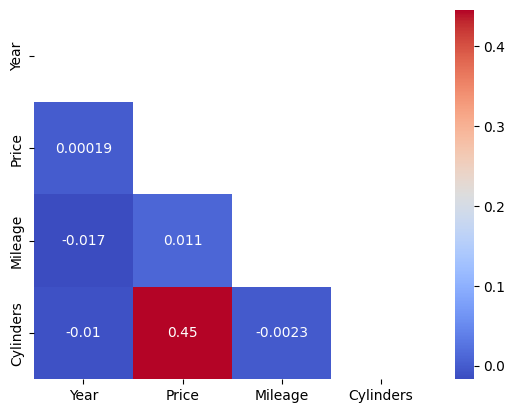

In [205]:
# set numerical_data to all numerical columns
numerical_data = data.select_dtypes(include=[np.number])
print(f"numerical data: {numerical_data.columns}")
mask = np.zeros_like(numerical_data.corr())
mask[np.triu_indices_from(mask)] = True 
sns.heatmap(numerical_data.corr(), annot=True, mask=mask, cmap='coolwarm')
plt.show()

# Base model

In [206]:
X_train, X_test, y_train, y_test = train_test_split(numerical_data.drop('Price', axis=1), numerical_data['Price'], test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (8000, 3)
X_test shape: (2000, 3)


In [207]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"root mean squared error: {root_mean_squared_error(y_test, y_pred)}")
base_metric = root_mean_squared_error(y_test, y_pred) / np.std(y_test)
print(f"RMSE to variance ratio: {base_metric}")

root mean squared error: 464905.8858062143
RMSE to variance ratio: 0.9079641260690466


## Feature engineering section

In [208]:
feature_data = pd.read_csv('uae_used_cars_10k.csv')
feature_data = feature_data.drop(["Description", "Model"], axis=1)
feature_data.columns

Index(['Make', 'Year', 'Price', 'Mileage', 'Body Type', 'Cylinders',
       'Transmission', 'Fuel Type', 'Color', 'Location'],
      dtype='object')

In [209]:
# feature_data['Make'].value_counts() if less than 200 -> set to "Other"
feature_data['Make'] = feature_data['Make'].apply(lambda x: x if feature_data['Make'].value_counts()[x] > 200 else 'Other')
feature_data['Make'].value_counts()

Make
Other            2065
mercedes-benz    1486
nissan            925
toyota            893
bmw               698
ford              541
land-rover        538
porsche           450
audi              397
jeep              345
lexus             339
chevrolet         303
mitsubishi        293
dodge             278
volkswagen        234
hyundai           215
Name: count, dtype: int64

In [210]:
feature_data["Year"].value_counts().sort_index()

Year
2005    517
2006    512
2007    502
2008    505
2009    491
2010    521
2011    480
2012    509
2013    493
2014    497
2015    463
2016    497
2017    494
2018    506
2019    521
2020    506
2021    487
2022    504
2023    484
2024    511
Name: count, dtype: int64

In [211]:
feature_data['age']=2025-feature_data['Year']

feature_data['km/year']=feature_data['Mileage']/feature_data['age']

feature_data.head()

,Make,Year,Price,Mileage,Body Type,Cylinders,Transmission,Fuel Type,Color,Location,age,km/year
0,toyota,2016,47819,156500,Sedan,4,Automatic Transmission,Gasoline,Black,Dubai,9,17388.888889
1,Other,2013,61250,169543,SUV,4,Automatic Transmission,Gasoline,Grey,Abu Dhabi,12,14128.583333
2,Other,2023,31861,221583,Soft Top Convertible,4,Automatic Transmission,Gasoline,Grey,Dubai,2,110791.500000
3,nissan,2016,110322,69754,Sedan,4,Automatic Transmission,Gasoline,Red,Dubai,9,7750.444444
4,toyota,2020,139994,71399,Pick Up Truck,4,Manual Transmission,Gasoline,White,Dubai,5,14279.800000


In [212]:
data["Transmission"].value_counts()

Transmission
Automatic Transmission    9626
Manual Transmission        374
Name: count, dtype: int64

In [213]:
data["Fuel Type"].value_counts()

Fuel Type
Gasoline    9714
Diesel       153
Electric     110
Hybrid        23
Name: count, dtype: int64

In [214]:
#one-hot encoding for Transmission and Fuel Type and Mark and Body Type
data = pd.get_dummies(data, columns=['Transmission', 'Fuel Type', "Make", "Body Type"])

In [215]:
# normalize numerical data except Target Price  
scaler = StandardScaler()
data[numerical_data.drop('Price', axis=1).columns] = scaler.fit_transform(data[numerical_data.drop('Price', axis=1).columns])
X_train, X_test, y_train, y_test = train_test_split(data.drop('Price', axis=1), data['Price'], test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"root mean squared error: {root_mean_squared_error(y_test, y_pred)}")
new_metric = root_mean_squared_error(y_test, y_pred) / np.std(y_test)
print(f"RMSE to variance ratio: {new_metric}")  
print(f"We improved the model by {base_metric - new_metric}")

X_train shape: (8000, 87)
X_test shape: (2000, 87)
root mean squared error: 383586.5599581743
RMSE to variance ratio: 0.7491469699943305
We improved the model by 0.15881715607471614


### 15% on basic feature changes - cool, let's try something really hard 

In [216]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# 1. Load dataset
df = pd.read_csv('uae_used_cars_10k.csv')

# 2. (Optional) Drop or transform the 'Description
df = df.drop(columns=['Description'])
df['age']=2025-df['Year']

df['km/year']=df['Mileage']/df['age']

df.head()
# 3. Separate features (X) and target (y)
X = df.drop('Price', axis=1)
scaler = ()
y = df['Price']
scaler = MinMaxScaler()
# 4. Identify categorical columns (object dtype) and apply One-Hot Encoding
categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X_encoded = scaler.fit_transform(X_encoded)
# 5. Split the data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, 
    y, 
    test_size=0.2, 
    random_state=42
)

# 6. Create and train the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42, max_depth=15)
model.fit(X_train, y_train)

# 7. Make predictions on the test set
y_pred = model.predict(X_test)

print(f"root mean squared error: {root_mean_squared_error(y_test, y_pred)}")
new_metric = root_mean_squared_error(y_test, y_pred) / np.std(y_test)
print(f"RMSE to variance ratio: {new_metric}")  
print(f"We improved the model by {base_metric - new_metric}") 

root mean squared error: 243589.95758064341
RMSE to variance ratio: 0.4757327229152251
We improved the model by 0.4322314031538215


# Results

1. **Model Improvement:**  
   Using the DecisionTreeRegressor, we improved the model by 43% of the described variance.

2. **Pipeline Recommendation:**  
   Since the dataset contains very expensive cars, the next pipeline should integrate a classification stage followed by a regression model or a neural network, rather than relying solely on a DecisionTreeRegressor.

3. **Data Distribution Insights:**  
   Additionally, the analysis did not focus on the distribution of the data, which could potentially provide further insights.
